In [3]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# get OWID data
df = pd.read_csv(
    "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/latest/owid-covid-latest.csv"
)
# rename columns as sample code uses other names....
df = df.rename(
    columns={
        "location": "Location",
        "iso_code": "Iso code",
        "total_tests": "Total tests",
        "people_vaccinated_per_hundred": "Vaccines",
        "new_cases": "Recent cases",
        "total_cases": "Total cases",
        "total_deaths": "Total deaths",
        "total_vaccinations": "Total vaccinations",
        "people_vaccinated": "People vaccinated",
        "population": "Population",
        "total_boosters": "Vaccination policy",
    }
).fillna(0)

# cols_dd = {"Total tests": "Total cases",
#            "Total deaths": "Recent cases", "Population": "Total vaccinations"}

cols_dd = ["Total tests", "Total cases", "Total deaths"]

fig = go.Figure(
    go.Scatter(
        x=df[np.random.choice(cols_dd, 1)[0]],
        y=df[np.random.choice(cols_dd, 1)[0]],
        hovertemplate='x: %{x} <br>y: %{y}',
        mode="markers"
    )
)

fig.update_layout(
    updatemenus=[
        {
            "buttons": [
                {
                    "label": f"x - {x}",
                    "method": "update",
                    "args": [
                        {"x": [df[x]]},
                        {"xaxis": {"title": x}},
                    ],
                }
                for x in cols_dd
            ]
        },
        {
            "buttons": [
                {
                    "label": f"y - {x}",
                    "method": "update",
                    "args": [{"y": [df[x]]}, {"yaxis": {"title": x}}],
                }
                for x in cols_dd
            ],
            "y": 0.9,
        },
    ],
    margin={"l": 0, "r": 0, "t": 25, "b": 0},
)
fig


In [6]:
fig = go.Figure(
    go.Scatter(
        x=np.array((1)),
        y=np.array((1)),
        hovertemplate='x: %{x} <br>y: %{y}',
        mode="markers"
    )
)
fig

In [112]:
import plotly.io as pio
import plotly.offline as pyo
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os
import sys
import pickle
import plotly.express as px
from scipy.interpolate import RegularGridInterpolator
from scipy.interpolate import interp1d

sys.path.append(os.path.dirname(os.getcwd()))
pyo.init_notebook_mode()
pio.templates.default = "none"

theta_list = pd.read_csv(
    'data/model144.csv', header=None).to_numpy()[:, 0] / 1000.
gamma_3_list = np.linspace(0, 1./3, 20)
xi_list_fullaversion_low = [0.025, 0.050, 10000.]
xi_list_fullaversion_high = [0.075, 0.150, 10000.]
xi_list_uncertainty_low = [0.050]
xi_list_uncertainty_high = [0.150]


def plot_simulatedpath_full2_lambda_post(graph_type, graph_title, yaxis_label, graph_range, before15):
    colors = ["#d62728", "darkorange", "darkgreen", "navy"]

    xi_base = 100000.
    psi_0 = 0.10583
    psi_1 = 0.5
    varrho = 1120.0
    delta = 0.01
    # fig = make_subplots(1, 2)
    color = ["#d62728", "darkgreen", "navy", "darkorange"]

    fig = go.Figure()
    # for abatement_cost in [0.1, 0.5]:
    #     for rho in [0.66, 1.0, 1.5]:
    abatement_cost = 0.5
    rho = 1.0

    if abatement_cost == 0.1:

        xi_list_fullaversion = [0.025, 0.050, 100000.]
        xi_list_uncertaintydecomp = [0.050]

    if abatement_cost == 0.5:

        xi_list_fullaversion = [0.075, 0.150, 100000.]
        xi_list_uncertaintydecomp = [0.150]

    folder = "./data_simul6/2jump_step_4.00,9.00_0.0,4.0_1.0,6.0_0.0,3.0_SS_0.2,0.1,0.1_LR_0.0025_FK_phi0_{}/".format(
        abatement_cost)
    i = 0
    # for xi in xi_list_fullaversion:
    xi = 0.150
    filename = "xi_a_{}_xi_k_{}_xi_c_{}_xi_j_{}_xi_d_{}_xi_g_{}_psi_0_{}_psi_1_{}_varrho_{}_rho_{}_delta_{}_" .format(
        xi_base, xi, xi, xi, xi, xi, psi_0, psi_1, varrho, rho, delta)

    # for TAjump in [1.5, 2.0]:
        # for gamma_3_i in gamma_3_list:
            
    with open(folder + filename + "model_tech1_pre_damage"+"_UD_simul_50" + "direct_direct", "rb") as f:
        model_tech1_pre_damage = pickle.load(f)
    # print(model_tech1_pre_damage.keys())
    # print(filename)
    # label = r'ξᵣ = {:.1f}'.format(xi_list_fullaversion[i])
    # if xi == 100000.:
    #     label = "Baseline"
    # if xi == 0.050 or xi == 0.150:
    #     label = "Less Aversion"
    # if xi == 0.025 or xi == 0.075:
    #     label = "More Aversion"
    # print(model_tech1_pre_damage[graph_type])

    # label ="λ₃={:.4f}".format(gamma_3_i)

    # if before15 == False:
    for k in [1.5, 2.0]:
        for j in [1.5, 2.0]:
            
            if k==1.5 and j ==1.5:
                
                graph_type1 = graph_type + "hist_k15_j15"
            
            if k==1.5 and j ==2:
                
                graph_type1 = graph_type + "hist_k15_j2"
                        
            if k==2 and j ==1.5:
                
                graph_type1 = graph_type + "hist_k2_j15"
                        
            if k==2 and j ==2:
                
                graph_type1 = graph_type + "hist_k2_j2"
                
            if k == 1.5:

                cost_label1 = "Low Capital, "

            else:
                cost_label1 = "High Capital, "

            if j == 1.5:

                cost_label2 = "Low R&D Stock"

            else:
                cost_label2 = "High R&D Stock"

            cost_label = cost_label1 + cost_label2

            if graph_type=="x":

                line15 = 3.55
                line2 = 5.82
            
            if graph_type=="e":
                line15 = 12.08
                line2 = 18.37


            grid = model_tech1_pre_damage["gamma_3_list"]
            # grid = (model_tech1_pre_damage["gamma_3_list"],)
            # grid = np.expand_dims(grid,axis=-1)
            value = model_tech1_pre_damage[graph_type1][:,0]
            # value = np.expand_dims(model_tech1_pre_damage[graph_type1][:,0],axis=-1)
            # print(grid.shape,value.shape)

            # graph_func = RegularGridInterpolator(grid, value)
            graph_func = interp1d(grid, value,kind="cubic")


            def point_return(line):

                err = 1

                x_lower = 0
                x_upper = 1/3

                x_lower = np.expand_dims(x_lower,axis=-1)
                x_upper = np.expand_dims(x_upper,axis=-1)

                while err > 10**(-9):

                    x_mid = (x_lower+x_upper)/2

                    if (graph_func(x_lower)-line)*(graph_func(x_mid)-line) < 0:
                        x_upper = x_mid

                    if (graph_func(x_upper)-line)*(graph_func(x_mid)-line) < 0:
                        x_lower = x_mid     
                    
                    err = max(abs(x_mid - x_upper),abs(x_mid - x_lower))

                return x_mid[0]
            


                
            # fig.update_traces(marker=dict(size=12),
            #     selector=dict(mode='markers'))
            color_cur=colors[i]
            # print(model_tech1_pre_damage["gamma_3_list"].shape)
            # print(model_tech1_pre_damage[graph_type1].shape)
            trace = go.Scatter(x=model_tech1_pre_damage["gamma_3_list"],
                                        y=model_tech1_pre_damage[graph_type1][:,0],
                                        name=cost_label,
                                        # showlegend=False,
                                        # visible=False,                                     
                                        line=dict(color=color_cur),
                                        mode="lines",
                                         visible=True
                                        )
            fig.add_trace(trace)
            # print(fig.layout.template.layout.colorway)


            # print(fig.data)
            
            if k == 1.5:

                fig.add_trace(go.Scatter(
                        x=np.array((point_return(line15))),
                        y=np.array((line15)),
                        hovertemplate='x: %{x} <br>y: %{y}',
                        name="Jump at 1.5 Degree",
                        mode="markers",
                        showlegend=False,
                        marker=dict(size=12,color=color_cur)
                    ))
                # print(point_return(line15))

            if k == 2:
                
                fig.add_trace(go.Scatter(
                        x=np.array((point_return(line2))),
                        y=np.array((line2)),
                        hovertemplate='x: %{x} <br>y: %{y}',
                        name="Jump at 2 Degree",
                        mode="markers",
                        showlegend=False,
                        marker=dict(size=12,color=color_cur)
                    ))

                # print(point_return(line2))

            i = i+1

    buttons = []
    i = 0



    fig.update_xaxes(showgrid=False, showline=True,
                     title="λ₃", range=[0, 1/3])
    fig.update_yaxes(showgrid=False,
                     showline=True,
                     range=graph_range,
                     title_text=yaxis_label,
                     tickformat=".2f")
    # fig.update_yaxes(showgrid=False, showline=True,
    #                  range=[1., 2.1], col=2, row=1)
    # fig.update_yaxes(tickvals=[1, 1.2, 1.4, 1.5, 1.6, 1.8, 2.0],
    #                  tickformat=".1f",
    #                  col=2,
    #                  row=1)
    # fig.update_layout(height=400, width=1280)
    fig.update_layout(
        title=graph_title,
        barmode="overlay",
        plot_bgcolor="white",
        width=1000,
        height=700,
        margin=dict(l=50, r=0))

    return fig

In [ ]:


def plot_simulated_stoc_path_full2_selected(graph_type, graph_title, yaxis_label, graph_range):


    xi_base = 100000.
    psi_0 = 0.10583
    psi_1 = 0.5
    varrho = 1120.0
    delta = 0.01
    # fig = make_subplots(1, 2)
    color = ["#d62728", "darkgreen", "navy", "darkorange"]
    j_dict = {"phi=0.1,rho=0.66":  [1, 25, 6, 10, 24], 
            "phi=0.1,rho=1.0":  [4, 7, 9, 2, 15],
            "phi=0.1,rho=1.5":  [5, 1, 24, 7, 12],
            "phi=0.5,rho=0.66":  [19, 4, 18, 10, 12],
            "phi=0.5,rho=1.0":  [4, 24, 20, 5, 12],
            "phi=0.5,rho=1.5":  [2, 7, 3, 24, 21]
            }
    fig = go.Figure()
    for abatement_cost in [0.1, 0.5]:
        for rho in [0.66, 1.0, 1.5]:

            if abatement_cost == 0.1:

                xi_list_fullaversion = [0.050]

            if abatement_cost == 0.5:

                xi_list_fullaversion = [0.150]
                

            folder = "./data_simul5/2jump_step_4.00,9.00_0.0,4.0_1.0,6.0_0.0,3.0_SS_0.2,0.1,0.1_LR_0.0025_FK_phi0_{}/".format(
                abatement_cost)
            i = 0
            label = "phi={},rho={}".format(abatement_cost,rho)
            j_list = j_dict[label]
            PathLength_selected = 5
            for xi in xi_list_fullaversion:
                filename = "xi_a_{}_xi_k_{}_xi_c_{}_xi_j_{}_xi_d_{}_xi_g_{}_psi_0_{}_psi_1_{}_varrho_{}_rho_{}_delta_{}_" .format(
                    xi_base, xi, xi, xi, xi, xi, psi_0, psi_1, varrho, rho, delta)

                with open(folder + filename + "model_tech1_pre_damage_UD_simulstoccompile2_40direct_direct", "rb") as f:
                    model_tech1_pre_damage = pickle.load(f)
                
                PathLength = model_tech1_pre_damage["years"].shape[1]
                Years = model_tech1_pre_damage["years"][:,0]
                
                Mat = model_tech1_pre_damage[graph_type][:,0:]

                for j in range(PathLength_selected):
                    
                    legend_name = "Path {}".format(j+1)
                    j_used = j_list[j]-1

                    if abatement_cost ==0.5 and rho==1.0:
                        fig.add_trace(go.Scatter(x=Years,
                                                    y=Mat[:, j_used],
                                                    name=legend_name,
                                                    showlegend=True,
                                                    visible=True,
                                                    # line=dict(width=8),
                                                    #  visible=False
                                                    ))
                    else:
                        fig.add_trace(go.Scatter(x=Years,
                                                 y=Mat[:, j_used],
                                                 name=legend_name,
                                                 showlegend=False,
                                                 visible=False,
                                                 # line=dict(width=8),
                                                 #  visible=False
                                                 ))

                # fig.update_traces(visible=False, line=dict(width=8))
                # fig.update_traces(visible=False)
                

                i = i+1

    # for i in range(PathLength_selected):
    #     fig.data[4*PathLength_selected + i]["visible"] = True
    #     # fig.data[3*2 + i+12]["visible"] = True

    #     fig.data[4*PathLength_selected + i]["showlegend"] = True
    #     # fig.data[3*2 + 12]["showlegend"] = True
    
    buttons = []
    i = 0

    for abatement_cost in [0.1, 0.5]:
        for rho in [0.66, 1.0, 1.5]:

            if abatement_cost == 0.1:

                cost_label = "φ₀=0.1"
            if abatement_cost == 0.5:

                cost_label = "φ₀=0.5"

            # Hide all traces
            label = cost_label+r', ρ' + '= {:.2f}'.format(rho)

            button = dict(method='update',
                          args=[
                              {
                                  'visible': [False] * (2 * 3 * PathLength_selected ),
                                  'showlegend': [False] * (2 * 3 * PathLength_selected ),
                              },
                          ],
                          label=label)
            # Enable the two traces we want to see
            # print(button['args'][0]["visible"])

            for j in range(PathLength_selected):
                
                button['args'][0]["visible"][PathLength_selected*i + j] = True

                button['args'][0]["showlegend"][PathLength_selected*i + j] = True

            i = i+1
            # Add step to step list
            buttons.append(button)



    fig.update_layout(
        updatemenus=[
            dict(
                type="dropdown",
                direction="down",
                buttons=buttons,
                active=4,
                x=0.6,
                y=1.05,
                pad={'r': 10, 't': 10})
        ],
    )
    
    fig.update_xaxes(showgrid=False, showline=True,
                    title="Years", range=[0, 40])
    fig.update_yaxes(showgrid=False,
                    showline=True,
                    range=graph_range,
                    title_text=yaxis_label,
                    tickformat=".2f")

    fig.update_layout(
        title=graph_title,
        barmode="overlay",
        plot_bgcolor="white",
        width=1000,
        height=800,
        margin=dict(l=50, r=0))


    return fig


plot_simulated_stoc_path_full2_selected_mat("LogSCGW_Plot", """Figure 25: Simulated Pathways of the Social Cost of Global Warming  <br> Exponential of vertical axis gives economic value in units of consumption""","", [6,14])

In [113]:
title = """Figure 45: Simulated Pathways of Emission <br> The x-axis represents the value of uncertain damage curvature."""

plot_simulatedpath_full2_lambda_post(graph_type="e", graph_title=title,
                                     yaxis_label="", graph_range=[10, 20], before15=False)


In [114]:
title = """Figure 44: Simulated Pathways of R&D Investment as percentage of GDP <br> The x-axis represents the value of uncertain damage curvature."""

plot_simulatedpath_full2_lambda_post(graph_type="x", graph_title=title,
                              yaxis_label="", graph_range=[0, 10], before15=False)


0

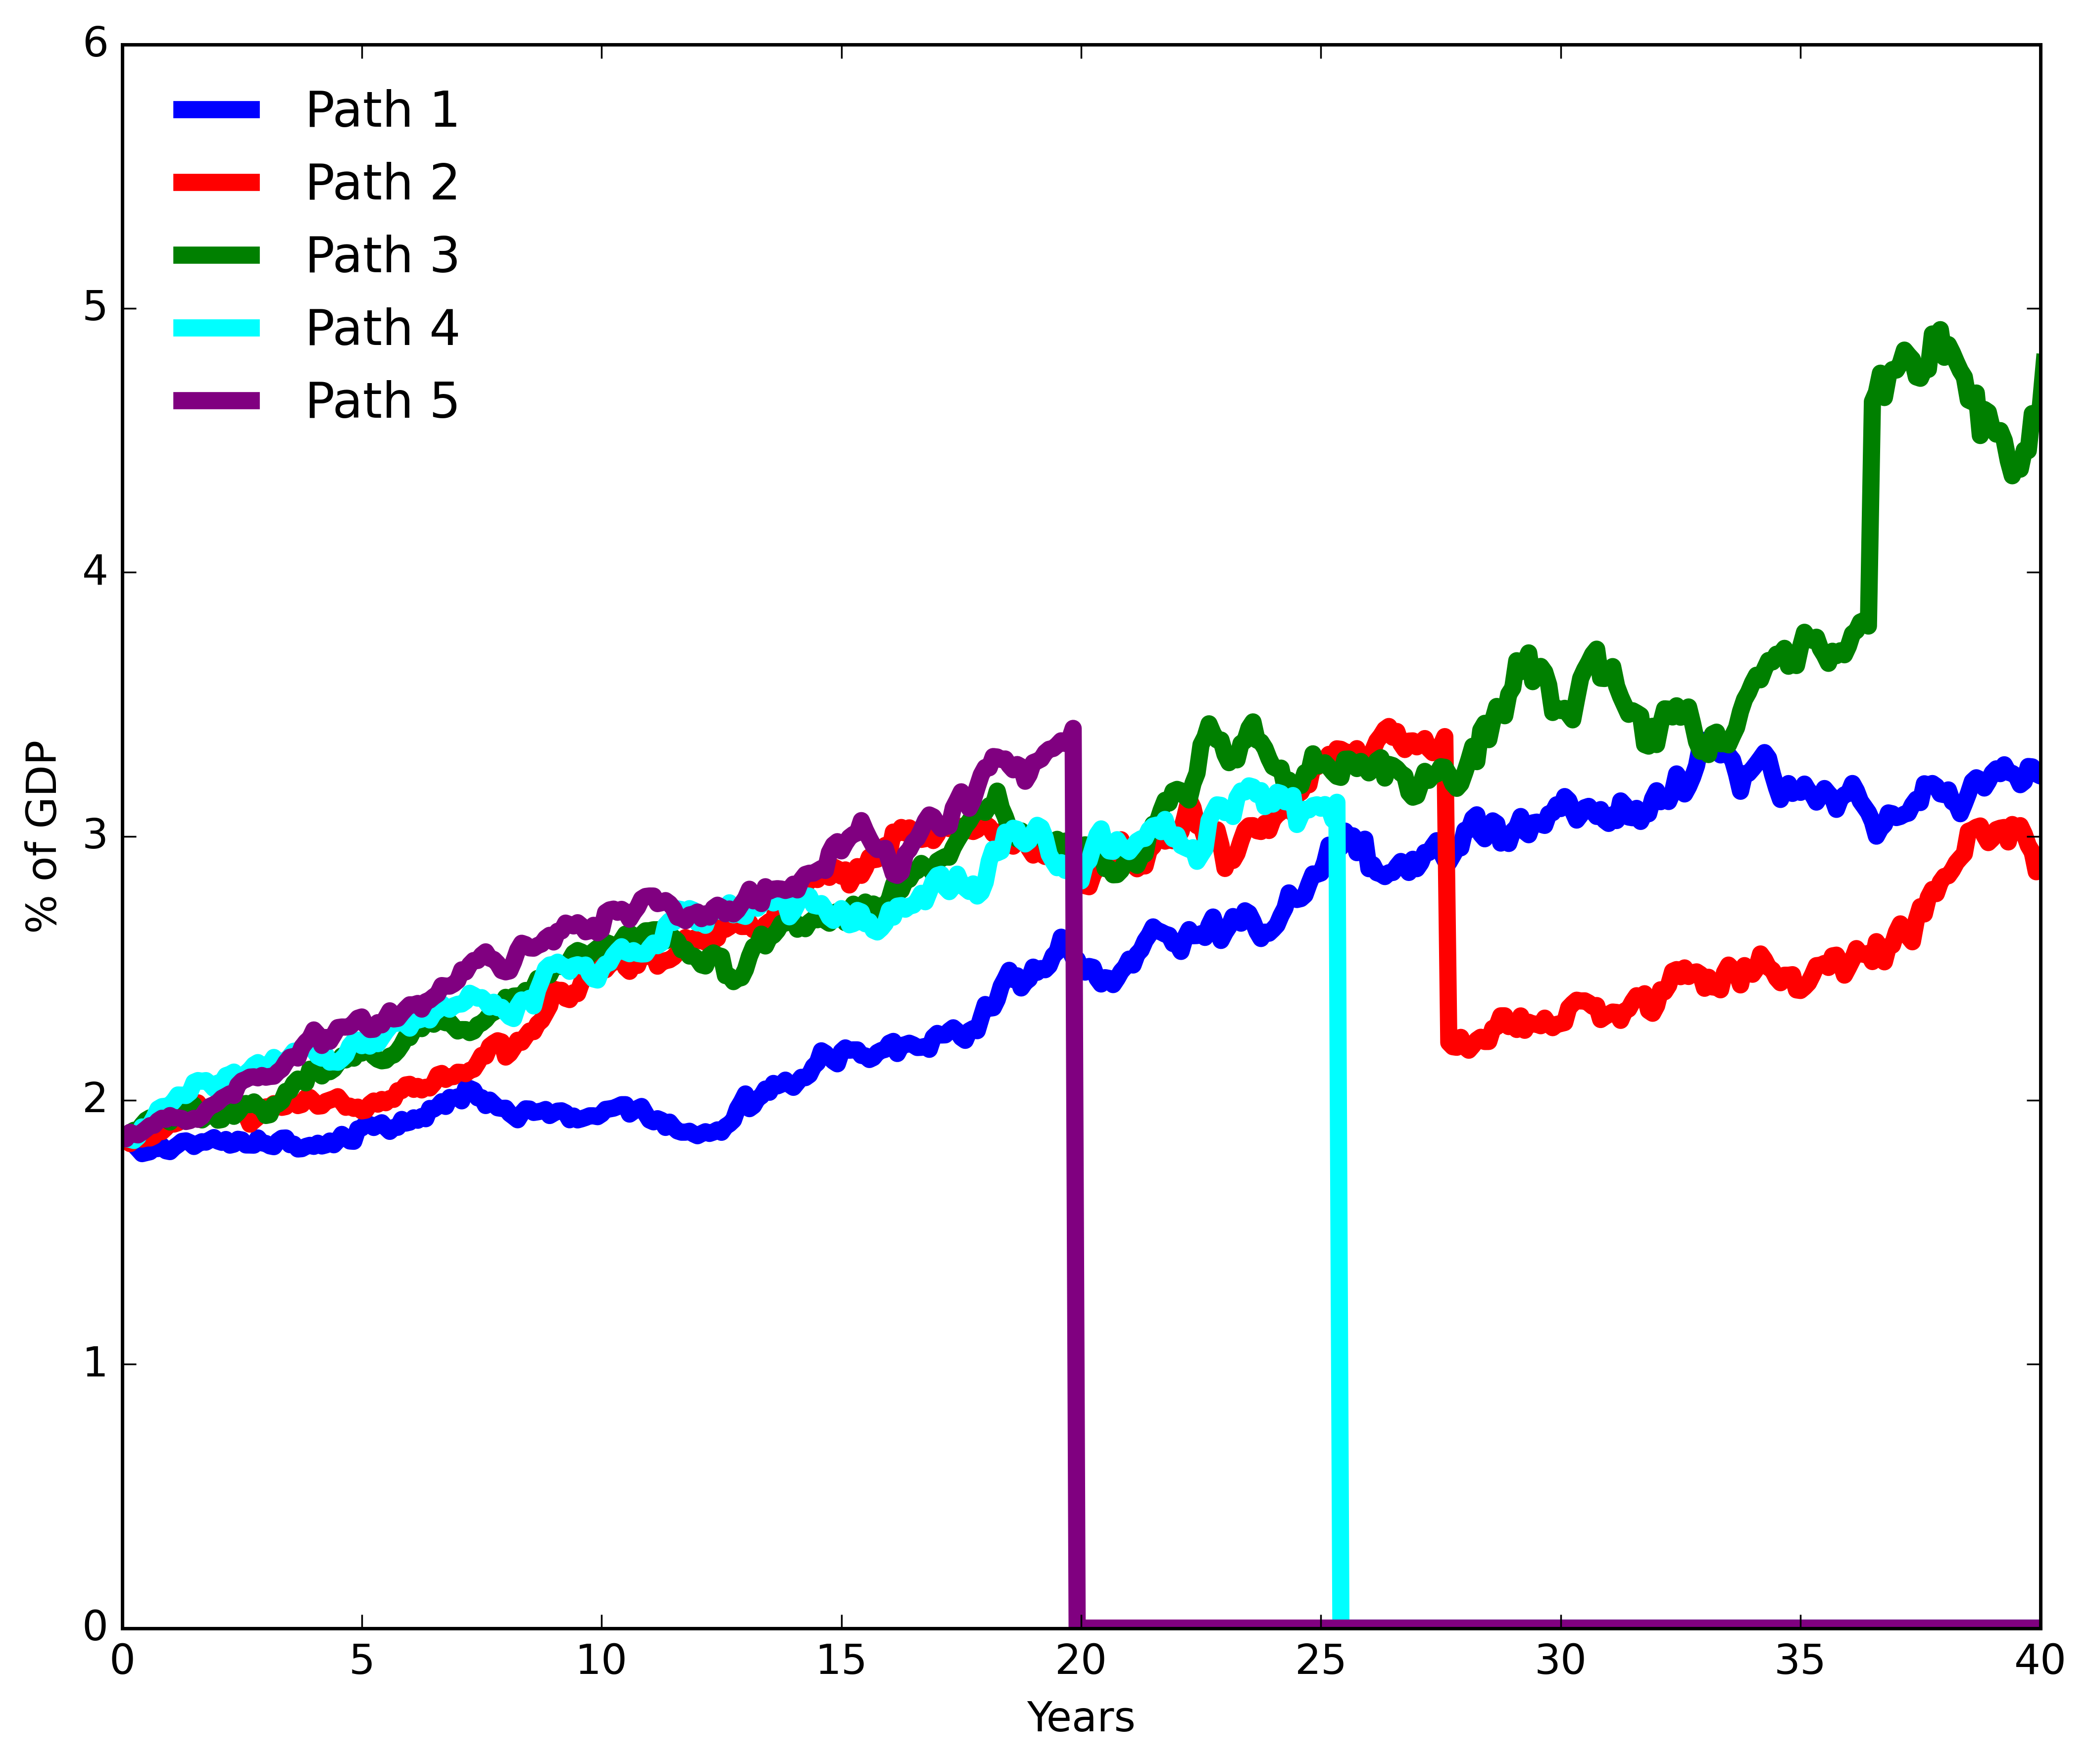

In [2]:
from src.plot import plot_simulated_stoc_path_full2_selected_mat



plot_simulated_stoc_path_full2_selected_mat("RD_Plot", "Figure 22: R&D Investment as Percentage of GDP","%", [0,6])

0

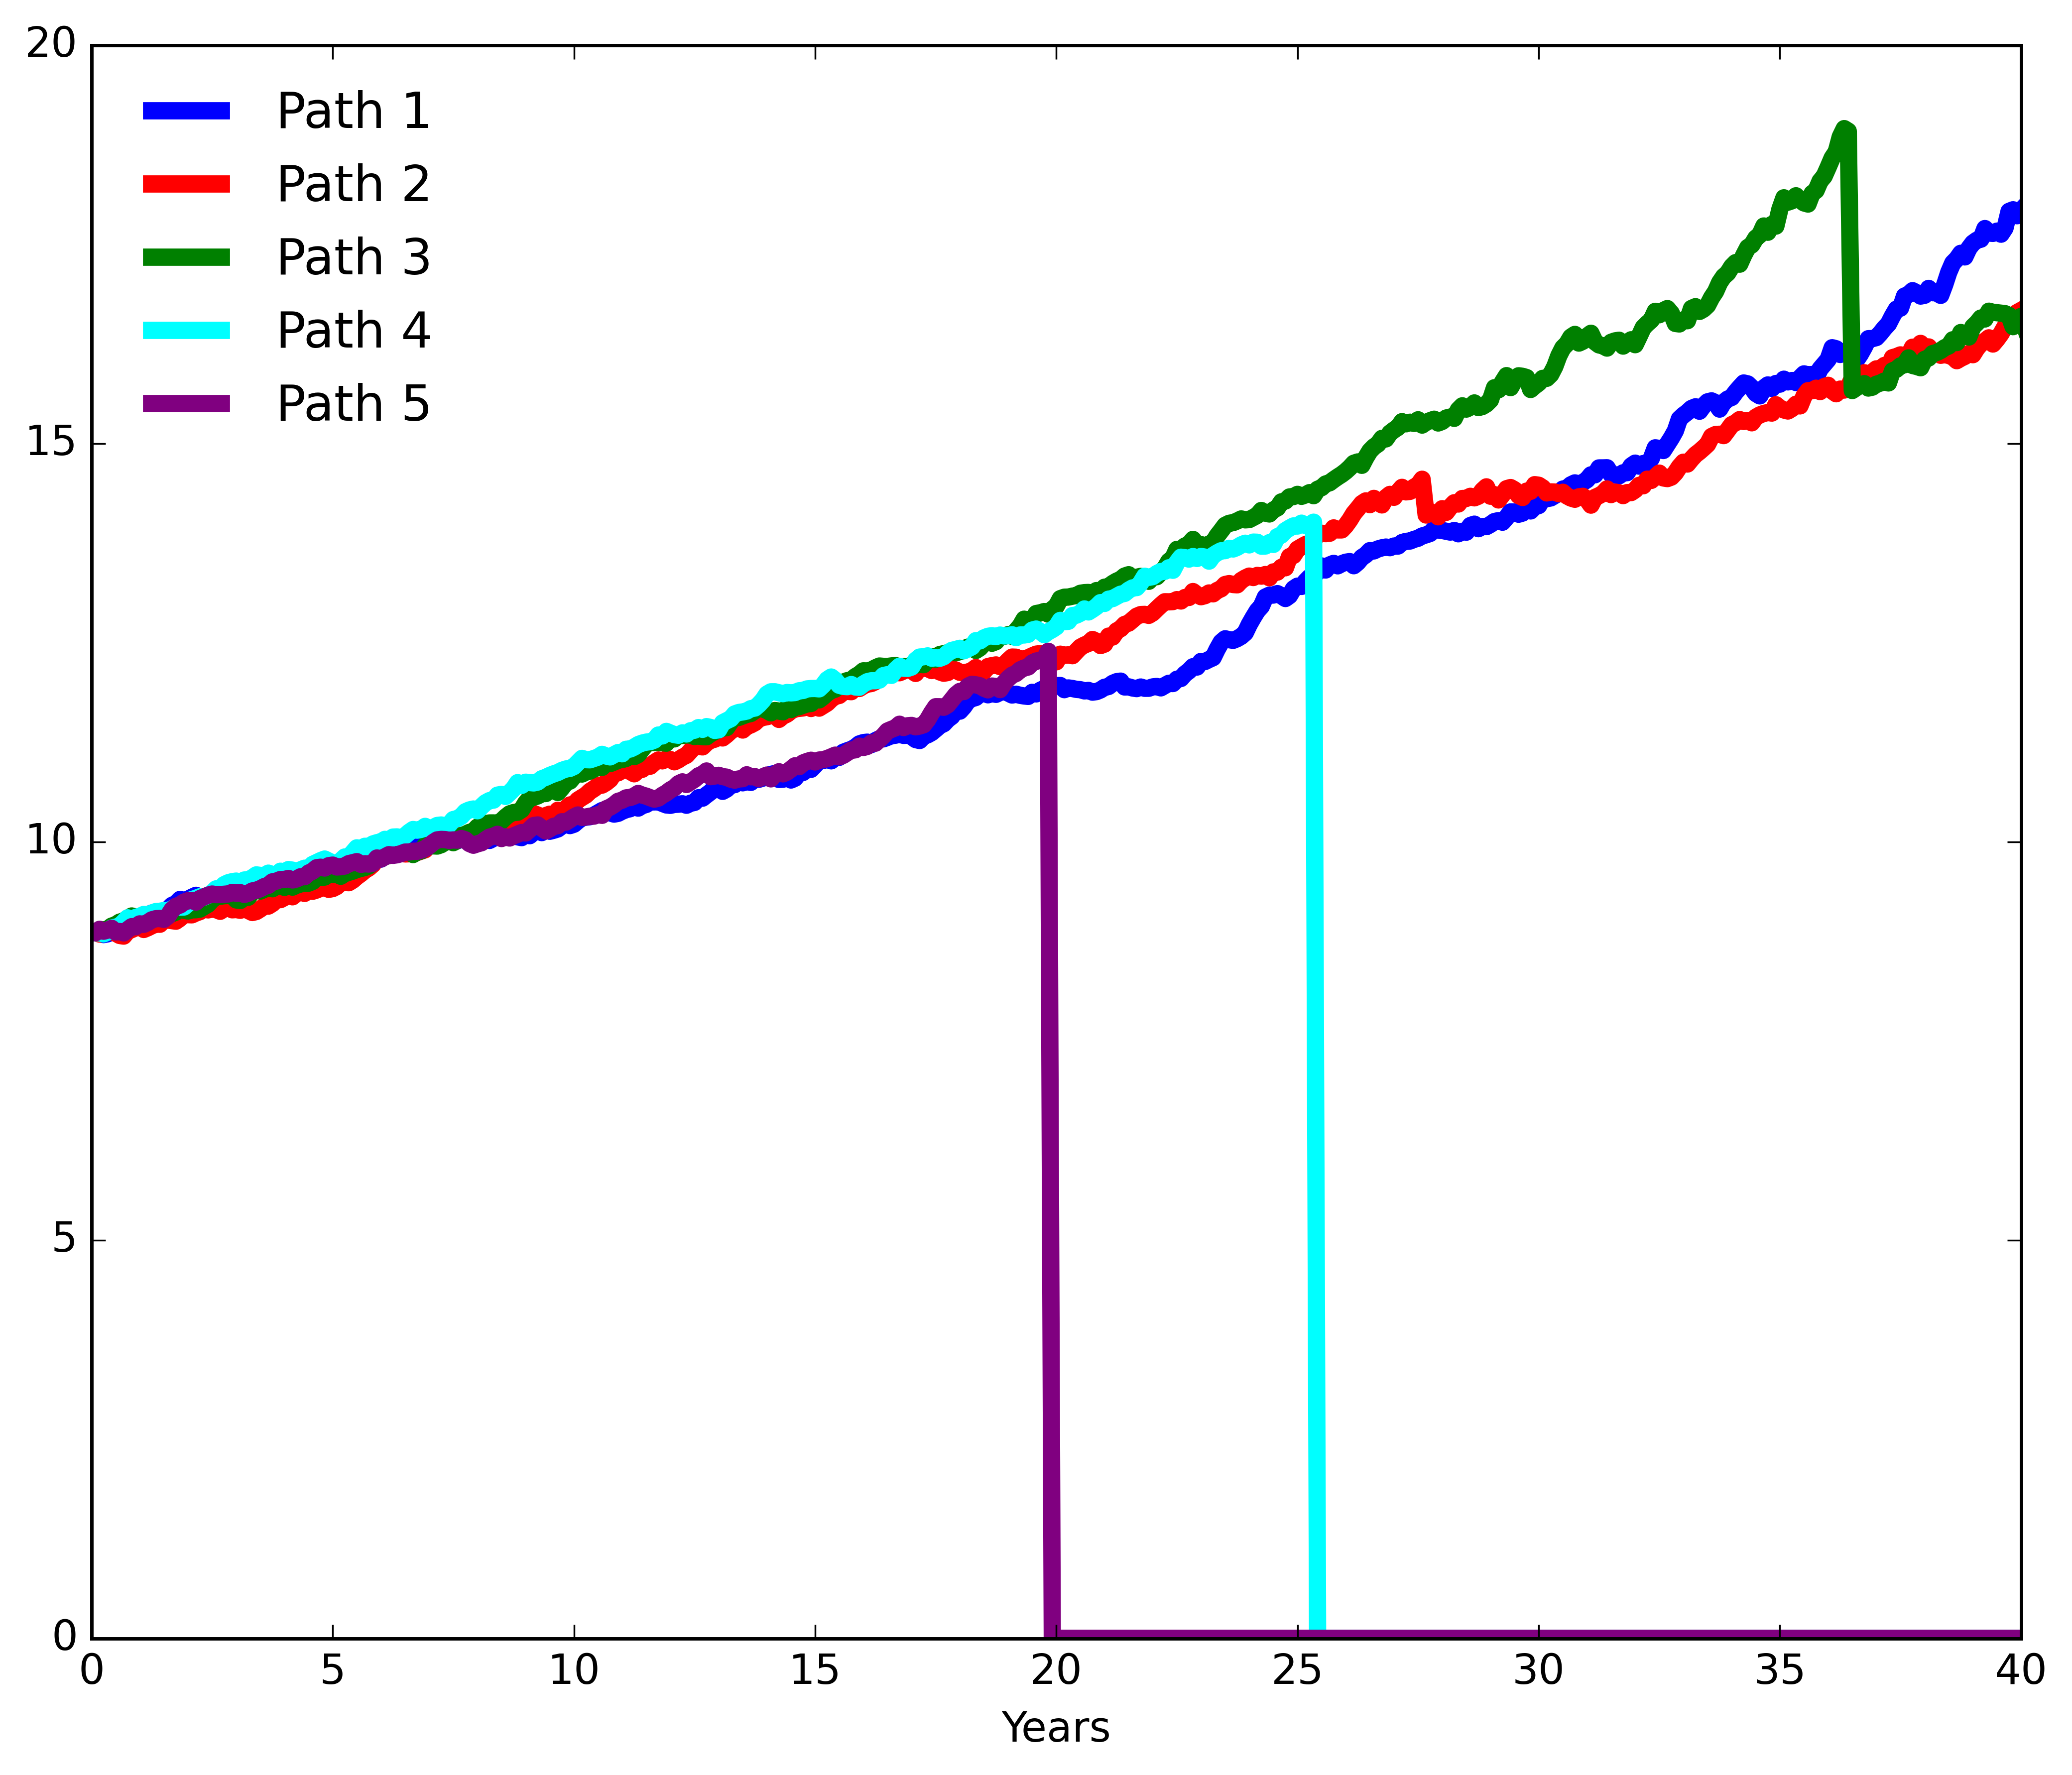

In [2]:
plot_simulated_stoc_path_full2_selected_mat("e", "Figure 22: R&D Investment as Percentage of GDP","%", [0,10])

0

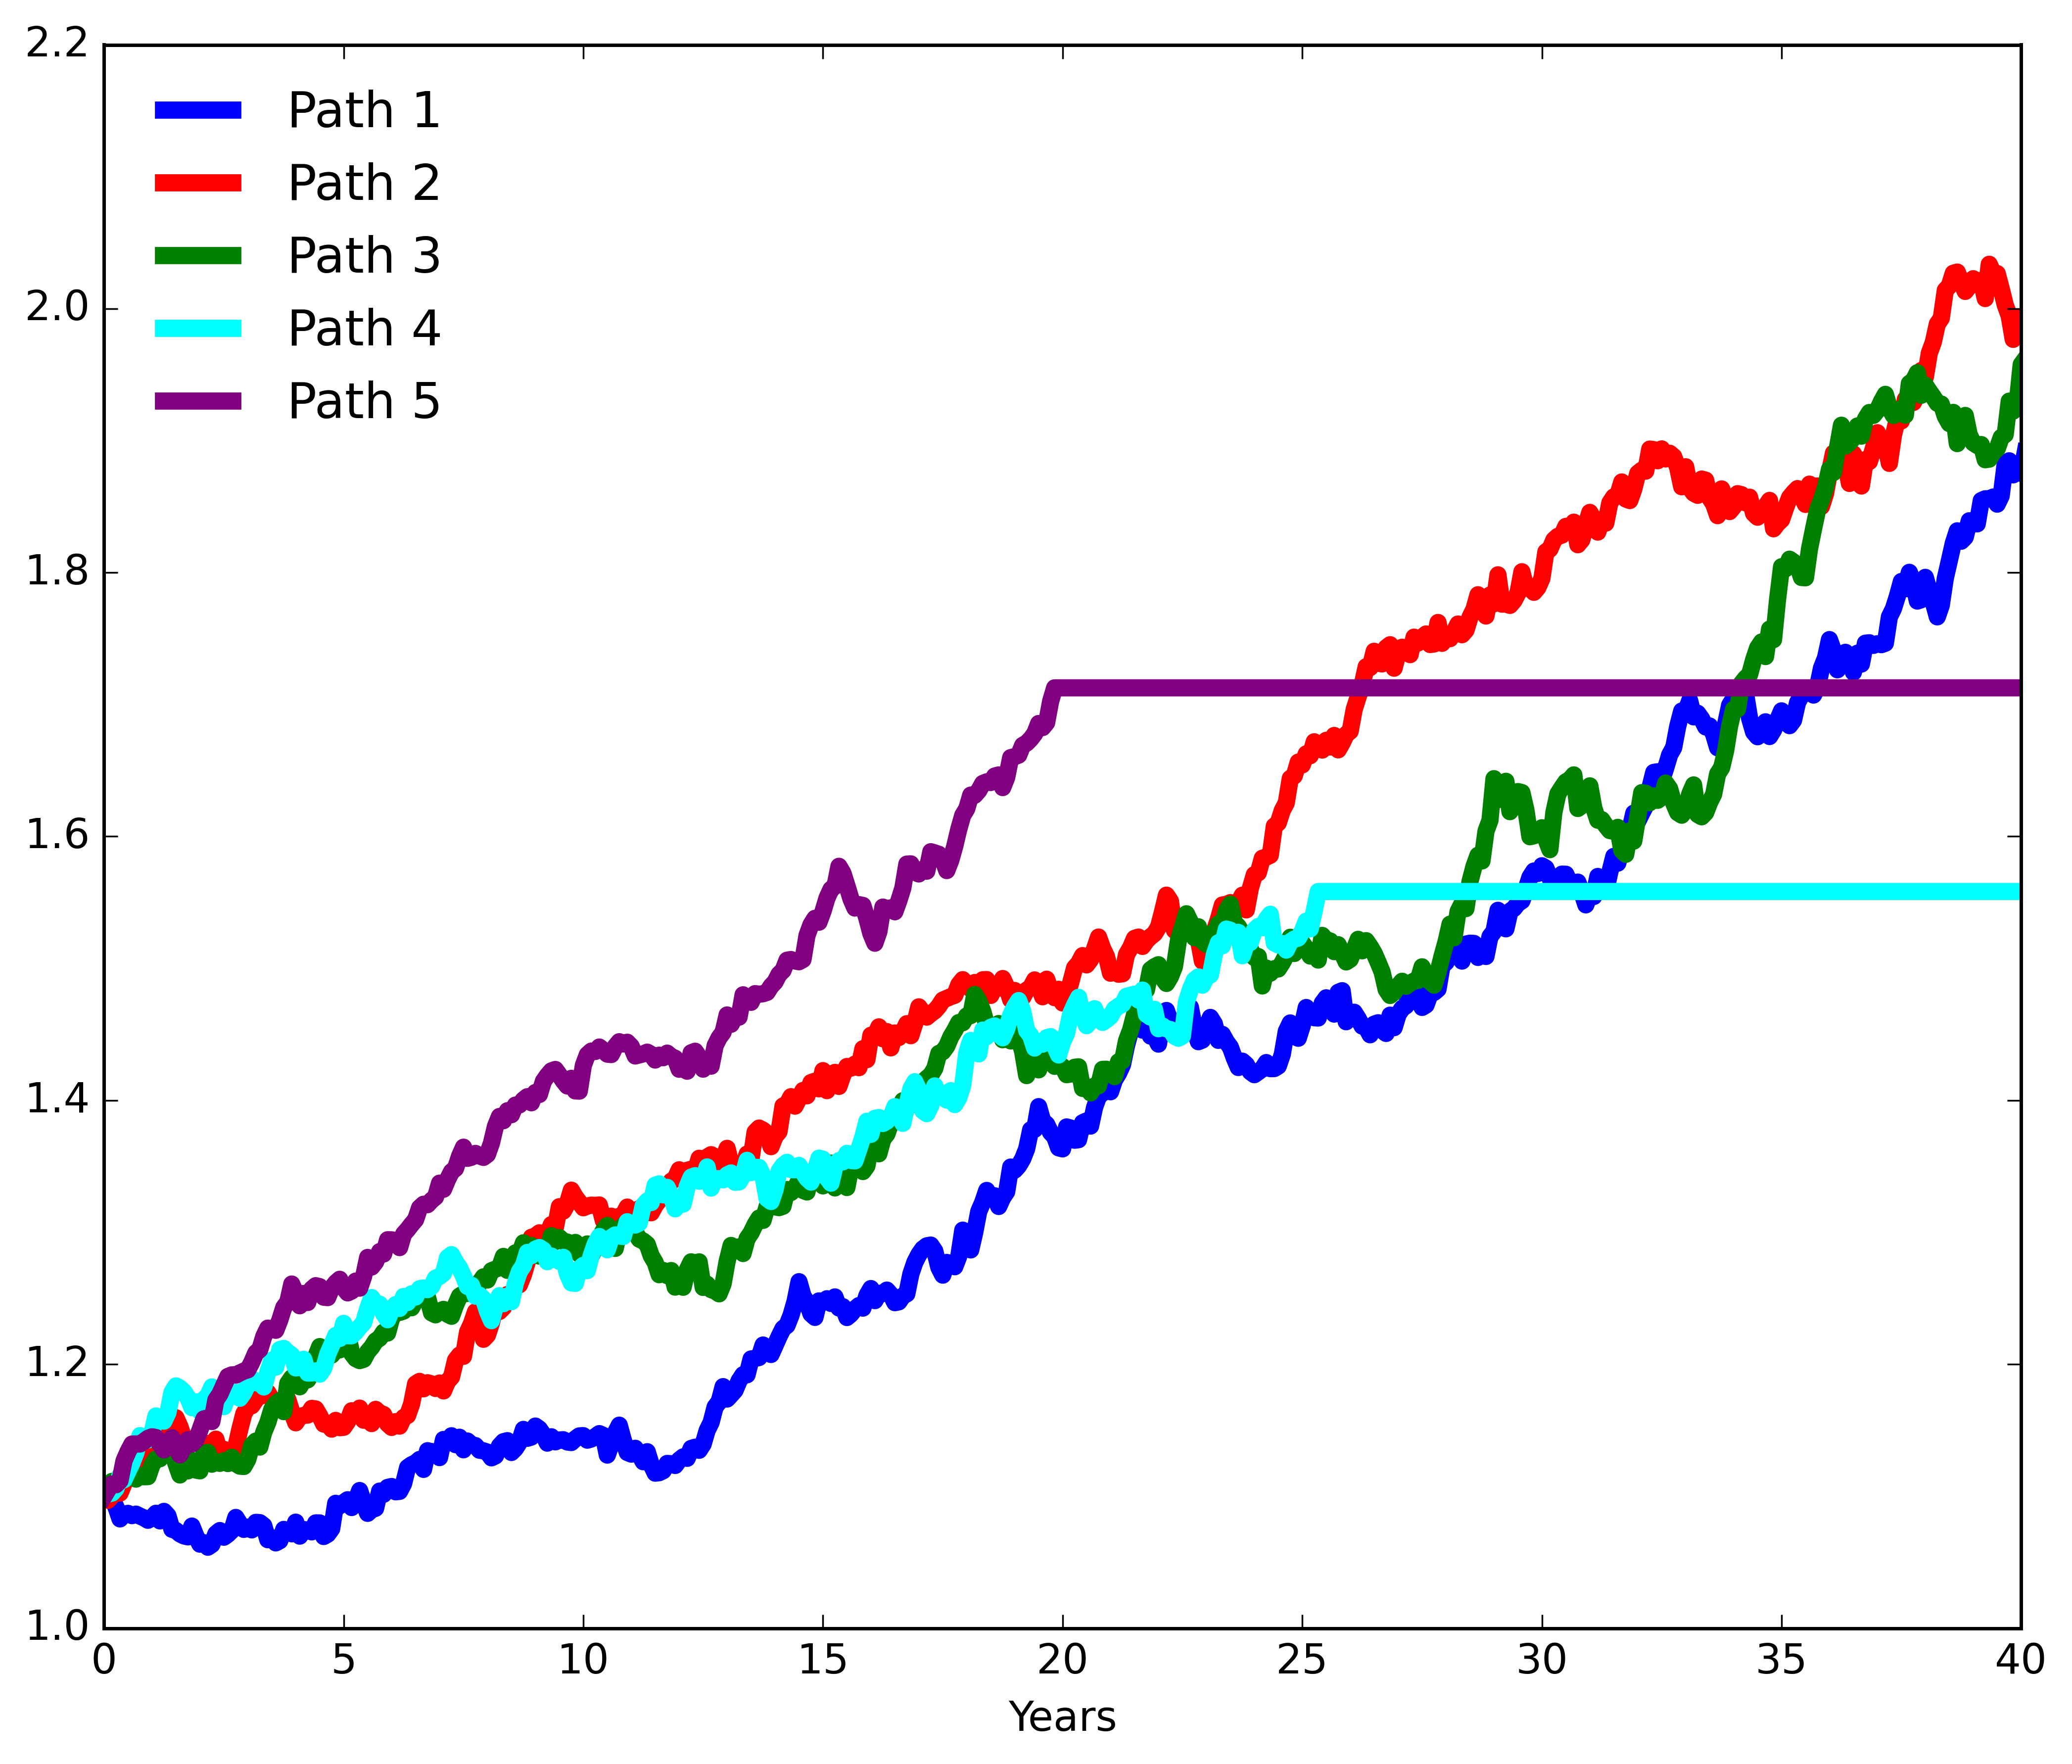

In [3]:
plot_simulated_stoc_path_full2_selected_mat("TA", "Figure 22: R&D Investment as Percentage of GDP","%", [0,10])